# NIH Application Data Analysis

### Aim: 
The aim of this analysis is to perform data analysis and visualization on some key information about NIH grant funding given in a particular year

### Input
1. nih-Worldwide2015.xls
2. us-states.csv
3. papers.csv

### Output:
1. Show the projects that are attributed to a medical school
2. Parse activity and institution codes according to the instructions below and store them as two new columns: ‘code’ (activity code) and ‘icode’ (institution code).
3. Keep only records where the activity code contains at least a single letter in the English alphabet
4. Find the 10 NIH institutes that gave the most funding.
5. Find the 10 Principal Investigators with the most number of grants.
6. Find the 10 organizations that have obtained the most diverse type of funding mechanisms
7. Find the total funding and average funding given per each state/country.
8. Find the top 10 US states with hightest funding
9. Draw a bar plot with state acronyms in the x axis and total funding in the y axis
10. Obtain funding amounts of each papers publsied and support year for a sample of 5000 records
11. Draw a scatter plot with Seaborn with ‘Funding’ in the x-axis and ‘papersNum’ in the y-axis
12. Run a linear regression model adjusted for support year to evaluate whether there exists a
    relationship between the funding amount and the number of papers produced

###  Import the libraries needed

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

### Load the funding data in “nih-Worldwide2015.xls” into a DataFrame and visualize the first 5 rows. Display the dtypes of the columns.

In [3]:
#Read csv file
nih_data_csv=pd.read_excel('nih-Worldwide2015.xls')

#Convert it into dataframe
nih_data=pd.DataFrame(nih_data_csv)

#Visualize the first 5 rows
nih_data.head(5)

,Organization Name,Project Number,Funding Mechanism,NIH Reference,PI Name,Project Title,DEPT NAME,NIH Dept Combining Name,NIH MC Combining Name,Direct Cost,...,Funding,Congressional District,City,State or Country Name,Zip Code,Attributed to Medical School,Medical School Location,Institution Type,Award Notice Date,FOA
0,"21ST CENTURY THERAPEUTICS, INC.",5R43GM109528-02,RPGs - SBIR/STTR,8860204,"SHAW, JIAJIU",Development of a Novel ELISA Kit for Screening...,NaN,NONE,UNAVAILABLE,NaN,...,335740,13.0,DETROIT,MICHIGAN,48220,NaN,NaN,NaN,2015-05-08,PA11-335
1,"21ST CENTURY THERAPEUTICS, INC.",1R43AT008202-01A1,RPGs - SBIR/STTR,8832837,"CHEN, BEN D.",Novel Compounds from Sycamore Leaves for the T...,NaN,NONE,UNAVAILABLE,NaN,...,303745,13.0,DETROIT,MICHIGAN,48220,NaN,NaN,NaN,2015-08-10,PA14-071
2,"2B TECHNOLOGIES, INC.",2R44ES024031-02,RPGs - SBIR/STTR,8977721,"BIRKS, JOHN W",Personal Exposure Monitoring of the Air Pollut...,NaN,NONE,UNAVAILABLE,NaN,...,499734,2.0,BOULDER,COLORADO,NaN,NaN,NaN,None,2015-07-20,PA14-071
3,3-C INSTITUTE FOR SOCIAL DEVELOPMENT,271201400075C-1-0-0,R&D Contracts,9041442,"SANCHEZ, REBECCA",IGF::OT::IGF : ARISE: AN ONLINE RELAPSE PREVE...,NaN,NONE,UNAVAILABLE,NaN,...,70112,4.0,DURHAM,NORTH CAROLINA,27513,NaN,NaN,None,NaT,NaN
4,3-C INSTITUTE FOR SOCIAL DEVELOPMENT,2R44DA035014-02,RPGs - SBIR/STTR,8981102,"MCMILLEN, JANEY STURTZ",Web-based Tool for the Dissemination of Eviden...,NaN,NONE,UNAVAILABLE,NaN,...,562731,4.0,DURHAM,NORTH CAROLINA,27513,NaN,NaN,None,2015-09-08,PA14-071


In [4]:
#Check the shape of the data
nih_data.shape

(52234, 21)

In [4]:
#Display datatypes of columns
nih_data.dtypes

Organization Name                       object
Project Number                          object
Funding Mechanism                       object
NIH Reference                            int64
PI Name                                 object
Project Title                           object
DEPT NAME                               object
NIH Dept Combining Name                 object
NIH MC Combining Name                   object
Direct Cost                            float64
Indirect Cost                          float64
Funding                                  int64
Congressional District                 float64
City                                    object
State or Country Name                   object
Zip Code                                object
Attributed to Medical School            object
Medical School Location                 object
Institution Type                        object
Award Notice Date               datetime64[ns]
FOA                                     object
dtype: object

In [5]:
# Check the missing values
nih_data.isna().sum()[nih_data.isna().sum()>0]

DEPT NAME                       12961
Direct Cost                      3754
Indirect Cost                    7734
Congressional District            502
State or Country Name               8
Zip Code                         1797
Attributed to Medical School    26561
Medical School Location         26830
Institution Type                 5354
Award Notice Date                2063
FOA                              2479
dtype: int64

In [5]:
#check the memory value of dataframe
nih_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52234 entries, 0 to 52233
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Organization Name             52234 non-null  object        
 1   Project Number                52234 non-null  object        
 2   Funding Mechanism             52234 non-null  object        
 3   NIH Reference                 52234 non-null  int64         
 4   PI Name                       52234 non-null  object        
 5   Project Title                 52234 non-null  object        
 6   DEPT NAME                     39273 non-null  object        
 7   NIH Dept Combining Name       52234 non-null  object        
 8   NIH MC Combining Name         52234 non-null  object        
 9   Direct Cost                   48480 non-null  float64       
 10  Indirect Cost                 44500 non-null  float64       
 11  Funding                     

## 1.Show the projects that are attributed to a medical school. 

In [6]:
#Drop null value
nih_data_df=nih_data.dropna(subset=["Attributed to Medical School"])

#Check shape
nih_data_df.shape

(25673, 21)

In [7]:
#Reset the index
nih_data_fin=nih_data_df.reset_index(drop=True)

#Display the new dataframe
nih_data_fin.head(2)

,Organization Name,Project Number,Funding Mechanism,NIH Reference,PI Name,Project Title,DEPT NAME,NIH Dept Combining Name,NIH MC Combining Name,Direct Cost,...,Funding,Congressional District,City,State or Country Name,Zip Code,Attributed to Medical School,Medical School Location,Institution Type,Award Notice Date,FOA
0,ALBANY MEDICAL COLLEGE,5R01HL110951-04,RPGs - Non SBIR/STTR,8775252,"TANG, DALE D.",Reorganization of the Actin Cytoskeleton in Ai...,CENTER FOR CARDIOVASCULAR SCIS,OTHER BASIC SCIENCES,SCHOOLS OF MEDICINE,246250.0,...,389075,20.0,ALBANY,NEW YORK,12208,Y,ALBANY MEDICAL COLLEGE,Domestic Higher Education,2014-12-12,PA10-067
1,ALBANY MEDICAL COLLEGE,1R01HL122865-01A1,RPGs - Non SBIR/STTR,8825232,"WANG, YONG-XIAO",Novel signaling in chronic hypoxic responses i...,CENTER FOR CARDIOVASCULAR SCIS,OTHER BASIC SCIENCES,SCHOOLS OF MEDICINE,304943.0,...,481810,20.0,ALBANY,NEW YORK,12208,Y,ALBANY MEDICAL COLLEGE,Domestic Higher Education,2014-12-05,PA13-302


## 2. Parse activity and institution codes according to the instructions below and store them as two new columns: ‘code’ (activity code) and ‘icode’ (institution code)

In [8]:
#use function for 'code' generation
def strip_letter_code(x):
    for i in nih_data['Project Number']:
        return nih_data['Project Number'].str[1:4]
    
#Call the function and convert series into df
activity_code=pd.DataFrame(strip_letter_code(nih_data['Project Number']))
code_df=activity_code.rename(columns={'Project Number':'code'})

#use function for 'icode' generation
def strip_letter_icode(x):
    for i in nih_data['Project Number']:
        return nih_data['Project Number'].str[4:6]

#Call the function and convert series into df
inst_code=pd.DataFrame(strip_letter_icode(nih_data['Project Number']))
icode_df=inst_code.rename(columns={'Project Number':'icode'})

#concate "code_df" and "icode_df" 
df=pd.concat([code_df, icode_df],axis=1)

#concate 'df' with 'nih_data'
nih_data_df=pd.concat([nih_data,df],axis=1)
nih_data_df.head(2)
nih_data_df1=nih_data_df[['Organization Name','Project Number','code','icode','Funding Mechanism','NIH Reference',
                         'PI Name','Project Title','DEPT NAME','NIH Dept Combining Name',
                          'NIH MC Combining Name','Direct Cost','Indirect Cost','Funding','Congressional District',
                          'City','State or Country Name','Zip Code','Attributed to Medical School',
                          'Medical School Location','Institution Type','Award Notice Date','FOA']]

nih_data_df1.head(2)

,Organization Name,Project Number,code,icode,Funding Mechanism,NIH Reference,PI Name,Project Title,DEPT NAME,NIH Dept Combining Name,...,Funding,Congressional District,City,State or Country Name,Zip Code,Attributed to Medical School,Medical School Location,Institution Type,Award Notice Date,FOA
0,"21ST CENTURY THERAPEUTICS, INC.",5R43GM109528-02,R43,GM,RPGs - SBIR/STTR,8860204,"SHAW, JIAJIU",Development of a Novel ELISA Kit for Screening...,NaN,NONE,...,335740,13.0,DETROIT,MICHIGAN,48220,NaN,NaN,NaN,2015-05-08,PA11-335
1,"21ST CENTURY THERAPEUTICS, INC.",1R43AT008202-01A1,R43,AT,RPGs - SBIR/STTR,8832837,"CHEN, BEN D.",Novel Compounds from Sycamore Leaves for the T...,NaN,NONE,...,303745,13.0,DETROIT,MICHIGAN,48220,NaN,NaN,NaN,2015-08-10,PA14-071


## 3. Keep only records where the activity code contains at least a single letter in the English alphabet.

In [9]:
nih_data_df2=nih_data_df1[nih_data_df1['code'].str.match('[A-Za-z]')]
nih_data_df2.head(2)

,Organization Name,Project Number,code,icode,Funding Mechanism,NIH Reference,PI Name,Project Title,DEPT NAME,NIH Dept Combining Name,...,Funding,Congressional District,City,State or Country Name,Zip Code,Attributed to Medical School,Medical School Location,Institution Type,Award Notice Date,FOA
0,"21ST CENTURY THERAPEUTICS, INC.",5R43GM109528-02,R43,GM,RPGs - SBIR/STTR,8860204,"SHAW, JIAJIU",Development of a Novel ELISA Kit for Screening...,NaN,NONE,...,335740,13.0,DETROIT,MICHIGAN,48220,NaN,NaN,NaN,2015-05-08,PA11-335
1,"21ST CENTURY THERAPEUTICS, INC.",1R43AT008202-01A1,R43,AT,RPGs - SBIR/STTR,8832837,"CHEN, BEN D.",Novel Compounds from Sycamore Leaves for the T...,NaN,NONE,...,303745,13.0,DETROIT,MICHIGAN,48220,NaN,NaN,NaN,2015-08-10,PA14-071


## 4. Find the 10 NIH institutes that gave the most funding. 

In [11]:
#Reset the index
nih_data_df3=nih_data_df2.reset_index (drop=True)
nih_data_df3.shape

(50173, 23)

In [12]:
#Group by 'icode' and sum 'funding'
inst_most=nih_data_df3.groupby('icode').sum('Funding')
inst_most_fund=inst_most.sort_values('Funding',ascending=False)

#Display the top ten institution that gave most funding
inst_most_fund.head(10)

,NIH Reference,Direct Cost,Indirect Cost,Funding,Congressional District
icode,,,,,
CA,62061839370,2.145057e+09,868002988.0,3067378774,78804.0
AI,44233444491,2.113741e+09,718423635.0,2816658845,53700.0
GM,51563527403,1.637772e+09,623613754.0,2305153448,68395.0
HL,41828159530,1.622649e+09,623433821.0,2275682842,47540.0
DK,35919527323,1.136917e+09,435990592.0,1594835858,42859.0
NS,34395568484,9.147012e+08,401556021.0,1339911506,43463.0
MH,26388745455,8.155083e+08,316386604.0,1161677004,34252.0
AG,19201571038,7.067191e+08,268387961.0,999538398,24479.0
HD,20672029009,7.168662e+08,242172617.0,971449006,25352.0


##  5. Find the 10 Principal Investigators with the most number of grants.

In [13]:
#group by 'PI Name' and count 'Project number', and sort values
group_pi=nih_data_df3.groupby('PI Name')['Project Number'].count().sort_values(ascending=False)

#Convert series to dataframe
group_pi_most=pd.DataFrame(group_pi)

#Display top ten PI with highest project number
group_pi_most.head(10)

,Project Number
PI Name,
"WOODLAND, DAVID L.",42
"STEWART, DAVID J.",30
"KAPLAN, DAVID L",12
"WANG, TIMOTHY CRAGIN",10
"CALIGIURI, MICHAEL A.",10
"SHARPLESS, NORMAN E",10
"ADAMSON, PETER C.",9
"SNYDER, MICHAEL P",9
"REZNIKOFF, WILLIAM S.",9


## 6. Find the 10 organizations that have obtained the most diverse type of funding mechanisms. 

In [14]:
#Obtain 10 organization with most diverse funding mechanism

#Group by 'organization name', count unique 'code', and sort values
organization_groupby=nih_data_df3.groupby('Organization Name')['code'].nunique().sort_values(ascending=False)

#convert series into dataframe
organization_groupby_df=pd.DataFrame(organization_groupby)

#Display top ten organizations
organization_groupby_df.head(10)

,code
Organization Name,
UNIVERSITY OF WASHINGTON,58
EMORY UNIVERSITY,54
WASHINGTON UNIVERSITY,53
UNIVERSITY OF CALIFORNIA LOS ANGELES,53
UNIVERSITY OF MICHIGAN,53
UNIVERSITY OF PITTSBURGH AT PITTSBURGH,53
UNIV OF NORTH CAROLINA CHAPEL HILL,52
UNIVERSITY OF PENNSYLVANIA,52
JOHNS HOPKINS UNIVERSITY,52


## 7. Find the total funding and average funding given per each state/country

In [15]:
# Use groupby function to group state
col_rename={'meanfunding':'mean-funding','sumfunding':'sum-funding'}
state_groupby=nih_data_df3.groupby('State or Country Name').agg(meanfunding=('Funding','mean'),
                                                                sumfunding=('Funding','sum')).rename(columns=col_rename)

#Display mean-funding and sum-funding by state or country
state_groupby

,mean-funding,sum-funding
State or Country Name,,
ALABAMA,456205.607774,258212374
ALASKA,751715.777778,13530884
ARGENTINA,118947.571429,832633
ARIZONA,382628.363868,150372947
ARKANSAS,443106.120879,40322657
...,...,...
WEST VIRGINIA,355504.220339,20974749
WISCONSIN,442692.426519,400636646
WYOMING,615290.764706,10459943


## 8. Note how there are also foreign countries. Load the “us-states.csv” file to keep only the US states and to create a separate column with the state acronym

In [16]:
#read us-states.csv file
us_states_csv=pd.read_csv('us-states.csv',header=None)

#Convert to dataframe and rename the column names
us_states_df=pd.DataFrame(us_states_csv)
us_states_df.columns=['StateName', 'State acronym']

#seperate the column
us_states_df[['State name','country']]=us_states_df['StateName'].str.split(",",expand=True)
us_states_df

#Keep only 'State name' and 'State acronym'
us_states=us_states_df.drop(columns=['StateName','country'])

#Make State name in uppercase
us_states['State name']=us_states['State name'].str.upper()

In [17]:
#Merge two dataframes

#Rename column name
state_groupby_df=state_groupby.reset_index(drop=False)
state_groupby_df=state_groupby_df.rename(columns={'State or Country Name':'State name'})

#merge two dataframe
merged_states=pd.merge(us_states,state_groupby_df, on='State name', how='inner')
merged_states.head(10)

,State acronym,State name,mean-funding,sum-funding
0,AL,ALABAMA,456205.607774,258212374
1,AK,ALASKA,751715.777778,13530884
2,AZ,ARIZONA,382628.363868,150372947
3,AR,ARKANSAS,443106.120879,40322657
4,CA,CALIFORNIA,450849.829401,3401211113
5,CO,COLORADO,352274.696507,322683622
6,CT,CONNECTICUT,413336.751581,457563784
7,DE,DELAWARE,499291.520548,36448281
8,FL,FLORIDA,473755.755920,520183820
9,GA,GEORGIA,419774.891020,481481800


## 9. Draw a bar plot with state acronyms in the x axis and total funding in the y axis. 

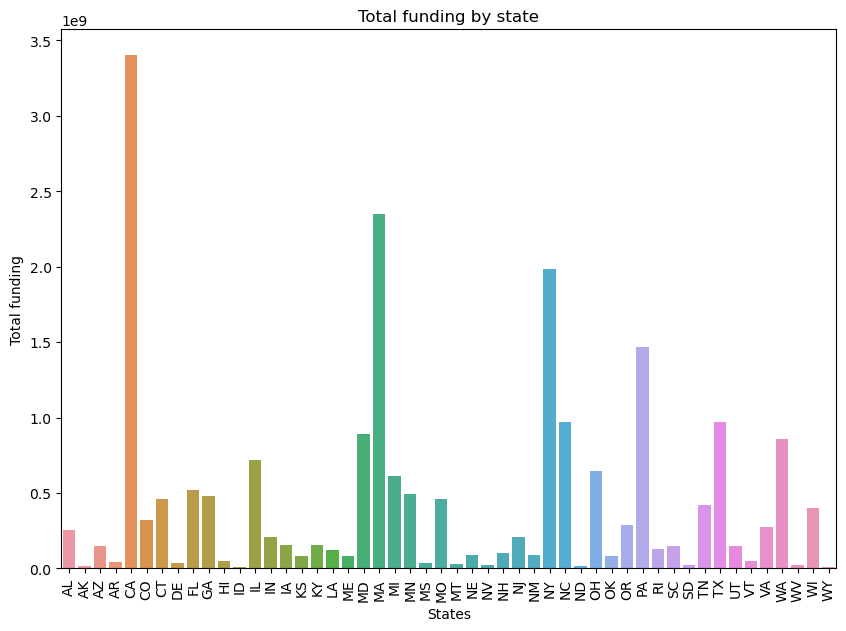

In [19]:
import warnings
warnings.filterwarnings('ignore')

#Create bar plot with seaborn
plt.figure(figsize=(10,7))
merged_states_bar=sns.barplot(x='State acronym', y='sum-funding',data=merged_states,ci=95)
plt.xticks(rotation=90)

#change the title, x-axis and y-axis
merged_states_bar.set(title='Total funding by state', xlabel='States',ylabel='Total funding')

#show the barplot
plt.show()
plt.ioff()

## 10. Load the ‘papers.csv’ file to a DataFrame. This file contains number of papers published and support year for a sample of 5,000 records from the ‘nih-Worldwide2015.xls’ file.

In [21]:
#Read the csv file
papers_csv=pd.read_csv('papers.csv')
papers_df=pd.DataFrame(papers_csv)

#Merge two dataframe
merged_papers_nih=pd.merge(papers_df,nih_data, on='Project Number',how='inner')

#Keep only four relavant column
merged_papers_nih_df=merged_papers_nih[['Project Number','year','papersNum','Funding']]
merged_papers_nih_df.head(3)

,Project Number,year,papersNum,Funding
0,5R01NS082746-03,3,3,318529
1,5R01AI041576-18,18,0,399221
2,5R01EY025102-02,2,0,189262


In [22]:
merged_papers_nih_df.shape

(5000, 4)

## 11. Draw a scatter plot with Seaborn with ‘Funding’ in the x-axis and ‘papersNum’ in the y-axis.

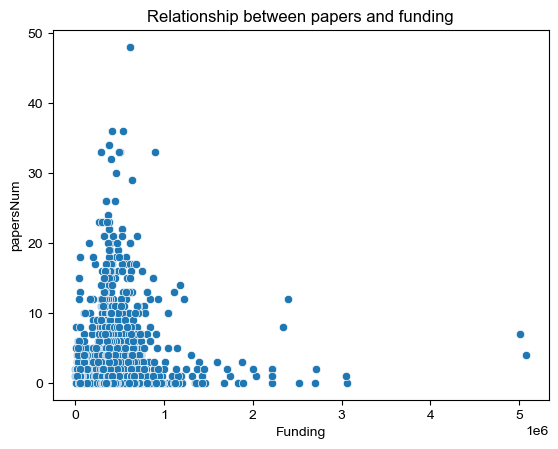

In [23]:
#Scatter plot using  seaborn
merged_papers_nih_scatter=sns.scatterplot(data=merged_papers_nih_df, x='Funding', y='papersNum')

#change the title, x-axis and y-axis
merged_papers_nih_scatter.set(title='Relationship between papers and funding')
sns.set_theme(style="darkgrid")
plt.show()
plt.ioff()

## 12. Now run a linear regression model adjusted for support year to evaluate whether there exists a relationship between the funding amount and the number of papers produced. 

In [24]:
data_reg=merged_papers_nih_df[['year','Funding','papersNum']]
data_reg=sm.add_constant(data_reg)
lsmod=sm.OLS(data_reg['papersNum'], data_reg[['const','year','Funding']]).fit()
lsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              papersNum   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     16.45
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           7.54e-08
Time:                        18:15:42   Log-Likelihood:                -13145.
No. Observations:                5000   AIC:                         2.630e+04
Df Residuals:                    4997   BIC:                         2.631e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0150      0.109      9.303      0.000       0.801       1.229
year           0.0357      0.007      5.034      0.000       0.022       0.050
Funding     5.728e-07   2.14e-07      2.675      0.007    1.53e-07    9.93e-07
==============================================================================
Omnibus:                     4918.989   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           255684.936
Skew:                           4.828   Prob(JB):                         0.00
Kurtosis:                      36.676   Cond. No.                     1.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### END